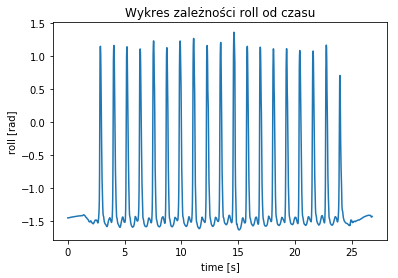

In [82]:
#wczytywanie pliku .csv z aplikacji Power Sense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#zakres kolumn do wczytania
cols = list(range(0,16))

#PANDAS

#wczytanie pliku
data_pd=pd.read_csv('15CH2L.csv', sep=',', header=0, usecols=cols)
#pominięcie wierszy z NaN
data_pd=data_pd.dropna()

#zmiana nazw kolumn
data_pd.columns = ['t', 'roll', 'pitch', 'yaw', 'rotX', 'rotY', 'rotZ', 'gravityX', 'gravityY', 'gravityZ',
              'accX', 'accY', 'accZ', 'magnetX', 'magnetY', 'magnetZ']

#rozpoczęcie liczenia czasu od 0
data_pd['t'] = data_pd['t'] - min(data_pd['t'])
#wypisanie pierwszych 10 wierszy
#print(data_pd.iloc[0:10,:])

#dostęp do kolumn
#print(data_pd['rotZ']) #kolumna rotation Z
#dostęp do wierszy
#print(data_pd.values[0,:]) #pierwszy wiersz danych
#dostęp do pojedynczej wartości
#print(data_pd.values[4, 6]) #piąty wiersz, siódma kolumna -> rotation Z
#dostęp do fragmetu tablicy
#print(data_pd.values[0:2, 0:4]) # dwa pierwsze wiersze, cztery pierwsze kolumny ?

#NUMPY

#wczytanie pliku
data_np = np.genfromtxt('15CH2L.csv', delimiter=',', skip_header=1, usecols=cols)
#pominięcie wierszy z NaN
data_np = data_np[~np.isnan(data_np).any(axis=1)]
#rozpoczęcie liczenia czasu od 0
data_np[:, 0] = data_np[:, 0] - min(data_np[:, 0])

#wyświetlenie parametru roll
plt.plot(data_np[:, 0], data_np[:, 1])
plt.xlabel('time [s]')
plt.ylabel('roll [rad]')
plt.title('Wykres zależności roll od czasu')
plt.show()

POZIOME


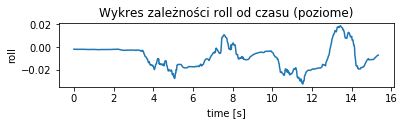

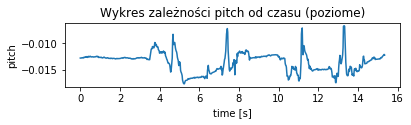

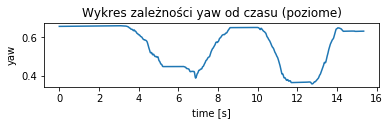

PIONOWE


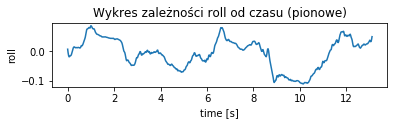

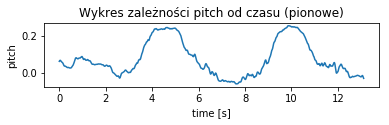

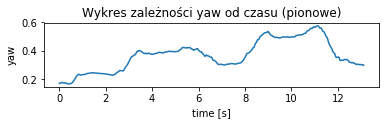

PRZÓD/TYŁ


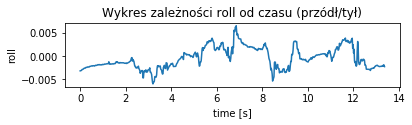

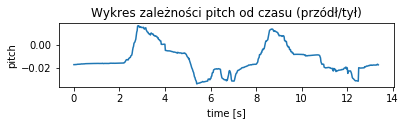

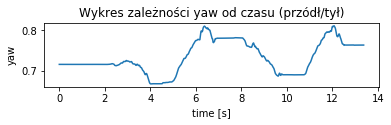

KOŁO


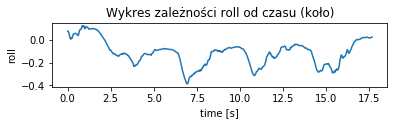

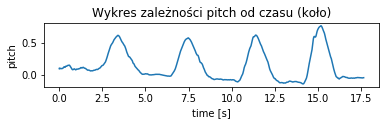

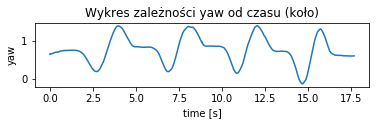

In [83]:
#wczytanie przykładowych ruchów (poziome, pionowe, przód/tył, koło) z aplikacji PowerSense
#+ wizualizacja

files = ['poziome.csv', 'pionowe.csv', 'przodtyl.csv', 'kolo.csv']
headers = ['t', 'roll', 'pitch', 'yaw', 'rotX', 'rotY', 'rotZ', 'gravityX', 'gravityY', 'gravityZ',
              'accX', 'accY', 'accZ', 'magnetX', 'magnetY', 'magnetZ']
cols = list(range(0,16))

#___________________________POZIOME__________________________________

data_pd=pd.read_csv(files[0], sep=',', header=0, usecols=cols)
data_pd=data_pd.dropna()
data_pd.columns = headers
data_pd['t'] = data_pd['t'] - min(data_pd['t'])
print('POZIOME')
plt.subplot(311)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 1])
plt.xlabel('time [s]')
plt.ylabel('roll')
plt.title('Wykres zależności roll od czasu (poziome)')
plt.show()

data_pd=pd.read_csv(files[0], sep=',', header=0, usecols=cols)
data_pd=data_pd.dropna()
data_pd.columns = headers
data_pd['t'] = data_pd['t'] - min(data_pd['t'])
plt.subplot(312)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 2])
plt.xlabel('time [s]')
plt.ylabel('pitch')
plt.title('Wykres zależności pitch od czasu (poziome)')
plt.show()

data_pd=pd.read_csv(files[0], sep=',', header=0, usecols=cols)
data_pd=data_pd.dropna()
data_pd.columns = headers
data_pd['t'] = data_pd['t'] - min(data_pd['t'])
plt.subplot(312)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 3])
plt.xlabel('time [s]')
plt.ylabel('yaw')
plt.title('Wykres zależności yaw od czasu (poziome)')
plt.show()

#____________________________PIONOWE_________________________________

data_pd=pd.read_csv(files[1], sep=',', header=0, usecols=cols)
data_pd=data_pd.dropna()
data_pd.columns = headers
data_pd['t'] = data_pd['t'] - min(data_pd['t'])
print('PIONOWE')
plt.subplot(311)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 1])
plt.xlabel('time [s]')
plt.ylabel('roll')
plt.title('Wykres zależności roll od czasu (pionowe)')
plt.show()

data_pd=pd.read_csv(files[1], sep=',', header=0, usecols=cols)
data_pd=data_pd.dropna()
data_pd.columns = headers
data_pd['t'] = data_pd['t'] - min(data_pd['t'])
plt.subplot(312)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 2])
plt.xlabel('time [s]')
plt.ylabel('pitch')
plt.title('Wykres zależności pitch od czasu (pionowe)')
plt.show()

data_pd=pd.read_csv(files[1], sep=',', header=0, usecols=cols)
data_pd=data_pd.dropna()
data_pd.columns = headers
data_pd['t'] = data_pd['t'] - min(data_pd['t'])
plt.subplot(312)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 3])
plt.xlabel('time [s]')
plt.ylabel('yaw')
plt.title('Wykres zależności yaw od czasu (pionowe)')
plt.show()

#___________________________PRZÓD/TYŁ__________________________________

data_pd=pd.read_csv(files[2], sep=',', header=0, usecols=cols)
data_pd=data_pd.dropna()
data_pd.columns = headers
data_pd['t'] = data_pd['t'] - min(data_pd['t'])
print('PRZÓD/TYŁ')
plt.subplot(311)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 1])
plt.xlabel('time [s]')
plt.ylabel('roll')
plt.title('Wykres zależności roll od czasu (przódł/tył)')
plt.show()

data_pd=pd.read_csv(files[2], sep=',', header=0, usecols=cols)
data_pd=data_pd.dropna()
data_pd.columns = headers
data_pd['t'] = data_pd['t'] - min(data_pd['t'])
plt.subplot(312)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 2])
plt.xlabel('time [s]')
plt.ylabel('pitch')
plt.title('Wykres zależności pitch od czasu (przódł/tył)')
plt.show()

data_pd=pd.read_csv(files[2], sep=',', header=0, usecols=cols)
data_pd=data_pd.dropna()
data_pd.columns = headers
data_pd['t'] = data_pd['t'] - min(data_pd['t'])
plt.subplot(312)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 3])
plt.xlabel('time [s]')
plt.ylabel('yaw')
plt.title('Wykres zależności yaw od czasu (przódł/tył)')
plt.show()

#___________________________KOŁO__________________________________

data_pd=pd.read_csv(files[3], sep=',', header=0, usecols=cols)
data_pd=data_pd.dropna()
data_pd.columns = headers
data_pd['t'] = data_pd['t'] - min(data_pd['t'])
print('KOŁO')
plt.subplot(311)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 1])
plt.xlabel('time [s]')
plt.ylabel('roll')
plt.title('Wykres zależności roll od czasu (koło)')
plt.show()

data_pd=pd.read_csv(files[3], sep=',', header=0, usecols=cols)
data_pd=data_pd.dropna()
data_pd.columns = headers
data_pd['t'] = data_pd['t'] - min(data_pd['t'])
plt.subplot(312)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 2])
plt.xlabel('time [s]')
plt.ylabel('pitch')
plt.title('Wykres zależności pitch od czasu (koło)')
plt.show()

data_pd=pd.read_csv(files[3], sep=',', header=0, usecols=cols)
data_pd=data_pd.dropna()
data_pd.columns = headers
data_pd['t'] = data_pd['t'] - min(data_pd['t'])
plt.subplot(312)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 3])
plt.xlabel('time [s]')
plt.ylabel('yaw')
plt.title('Wykres zależności yaw od czasu (koło)')
plt.show()